In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Read the dataset to the python environment

In [2]:
data = pd.read_excel('iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.shape

(150, 5)

In [4]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [5]:
data.Classification.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Classification, dtype: int64

## 2. Necessary pre-processing steps 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()#statistical description

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#checking for null-values
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

**Insights:**
- Given dataset has 150 rows and 5 columns, indicating floral properties of  Iris-versicolor,Iris-setosa and Iris-virginica.
- Null values are present in the dataset.

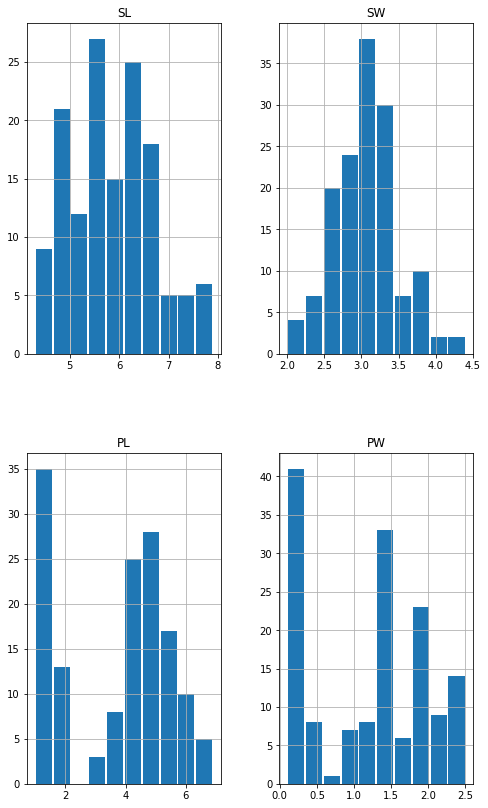

In [9]:
import warnings;warnings.filterwarnings("ignore")


#understanding data distribution using histogram
distribution = data[['SL','SW','PL','PW']]
distribution.hist(rwidth=0.9,figsize=(8,14))
plt.show()

In [10]:
#filling null-values with median
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL']=data['PL'].fillna(data['PL'].median())

In [11]:
#checking for null-values after handling them:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

> All null-values are managed.
> Now we shall check and handle the outliers.

<AxesSubplot:xlabel='SL'>

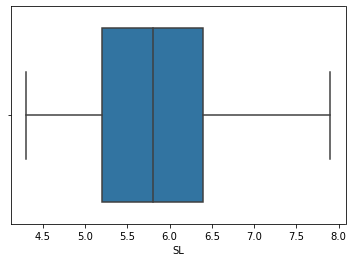

In [12]:
#outlier in SL
sns.boxplot(data['SL'])

<AxesSubplot:xlabel='SW'>

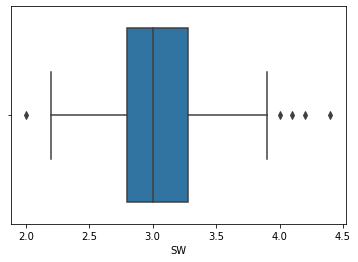

In [13]:
#outlier in SW
sns.boxplot(data['SW'])

<AxesSubplot:xlabel='PL'>

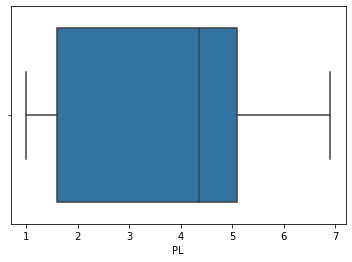

In [14]:
#outlier in PL
sns.boxplot(data['PL'])

<AxesSubplot:xlabel='PW'>

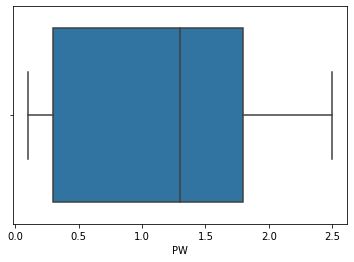

In [15]:
#outlier in PW
sns.boxplot(data['PW'])

**> Only SW column has outliers present.**

In [16]:
#Finding IQR(interquartile range) inorder to handle outliers in SW:
df=data

Q1 = np.percentile(df['SW'], 25, interpolation = "midpoint")
Q2 = np.percentile(df['SW'], 50, interpolation = "midpoint")
Q3 = np.percentile(df['SW'], 75, interpolation = "midpoint")
IQR = Q3-Q1 ; print("IQR is",IQR)
low_limit = Q1-1.5*IQR ; print("lower limit is",low_limit)
upper_limit = Q3+1.5*IQR ; print("upper limit is",upper_limit)

IQR is 0.4500000000000002
lower limit is 2.1249999999999996
upper limit is 3.9250000000000003


In [17]:
#finding outliers
outliers = []
for x in df['SW']:
    if ( x < low_limit ) or ( x > upper_limit ):
        outliers.append(x)

In [18]:
outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

In [19]:
index_drop1 = df['SW']>upper_limit;index_drop2 = df['SW']<low_limit
df.loc[index_drop2].index

Int64Index([60], dtype='int64')

In [20]:
df.loc[index_drop1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [21]:
df.drop([14, 15, 32, 33,60],inplace=True)
#outliers are dropped

<AxesSubplot:xlabel='SW'>

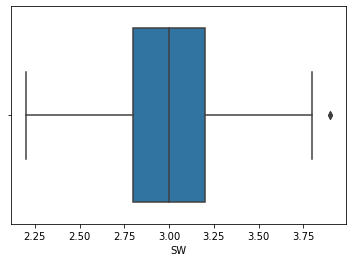

In [22]:
#SW after dropping:
#outlier in SW
sns.boxplot(df['SW'])

## 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm) 

In [23]:
#logistic regression
x = df.drop('Classification',axis=1)
y = df['Classification']


#Spliting of data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)

In [24]:
print(y_test[:])
print(y_predict[:])

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
122     Iris-virginica
131     Iris-virginica
113     Iris-virginica
89     Iris-versicolor
20         Iris-setosa
12         Iris-setosa
59     Iris-versicolor
133     Iris-virginica
83     Iris-versicolor
78     Iris-versicolor
40         Iris-setosa
117     Iris-virginica
138     Iris-virginica
105     Iris-virginica
106     Iris-virginica
99     Iris-versicolor
141     Iris-virginica
11         Iris-setosa
71     Iris-versicolor
35         Iris-setosa
49         Iris-setosa
55     Iris-versicolor
81     Iris-versicolor
116     Iris-virginica
9          Iris-setosa
4          Iris-setosa
28         Iris-setosa
125     Iris-virginica
130     Iris-virginica
18         Iris-setosa
10         Iris-setosa
123     Iris-virginica
Name: Classification, dtype: object
['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

print("Training accuracy is :",accuracy_score(y_test,y_predict))
print("precision is :",precision_score(y_test,y_predict,average='macro'))
print("recall is :",recall_score(y_test,y_predict,average='macro'))
print("F1 score is :",f1_score(y_test,y_predict,average='macro'))

Training accuracy is : 0.8918918918918919
precision is : 0.8834498834498835
recall is : 0.8915343915343915
F1 score is : 0.8839506172839506


In [32]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier

In [33]:
acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

[0.918918918918919, 0.8918918918918919, 0.918918918918919, 0.8648648648648649, 0.8918918918918919, 0.8378378378378378, 0.918918918918919, 0.8918918918918919, 0.918918918918919, 0.8648648648648649, 0.8648648648648649, 0.8648648648648649]


Text(0, 0.5, 'accuracy')

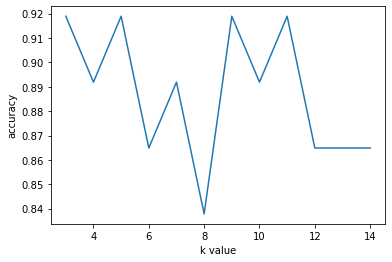

In [35]:
print(acc_val)
plt.plot(neighbors,acc_val)
plt.xlabel("k value")
plt.ylabel("accuracy")

In [37]:

classifer = KNeighborsClassifier(n_neighbors=4,metric = "minkowski") 
classifer.fit(x_train,y_train)
predict1 = classifer.predict(x_test)

y_train_pred1 = classifer.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred1))
print("The accuracy score of KNN model is : ", accuracy_score(y_test,predict1))
print("The F1 score of KNN model is : ", f1_score(y_test,predict1,average="micro"))

Training Accuracy is :  0.9814814814814815
The accuracy score of KNN model is :  0.8918918918918919
The F1 score of KNN model is :  0.8918918918918919


In [39]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(x_train,y_train)
y_prd=rm.predict(x_test)

In [40]:
y_prd[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [41]:
y_test[0:5]

74     Iris-versicolor
145     Iris-virginica
29         Iris-setosa
21         Iris-setosa
46         Iris-setosa
Name: Classification, dtype: object

In [43]:
print("Training accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

Training accuracy is : 0.9459459459459459
precision is : 0.9391534391534391
recall is : 0.9391534391534391
F1 score is : 0.9391534391534391


In [44]:
#decision tree model
from sklearn.tree import DecisionTreeClassifier

In [45]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
predict = d_tree.predict(x_test)

y_train_pred3 = d_tree.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred3))
print("The accuracy score of Decision tree model is : ", accuracy_score(y_test,predict))
print("The f1 score of Decision tree model is : ", f1_score(y_test,predict,average="micro"))

Training Accuracy is :  1.0
The accuracy score of Decision tree model is :  0.918918918918919
The f1 score of Decision tree model is :  0.918918918918919


In [47]:
#gradient booster model
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predict = gbc.predict(x_test)

y_train_pred = gbc.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred))
print("The accuracy score for GradientBoostingClassifier Model is : ", accuracy_score(y_test,predict))
print("The f1 score is : ", f1_score(y_test,predict,average="micro"))

Training Accuracy is :  1.0
The accuracy score for GradientBoostingClassifier Model is :  0.918918918918919
The f1 score is :  0.918918918918919


**Insights:**
    >  All models above are really performing well
    >  But, as seen above Tree based models perform relatively well because they aren't much affected by outliers, as          compared to regression-based models.
    >  From above, the best models we can choose are **Random forest model and Gradient booster model.**